<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
data = pd.read_csv("../data/states_edu.csv")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [13]:
data.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'EXPENDITURE_PER_STUDENT',
       'AVERAGE_REVENUE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
# drop NaN values for cleaning up dataset
data.dropna()
# fill enrollment NaNs by taking sum of all students (primary, kg, hs)
data['GRADES_ALL_G'] = data['GRADES_ALL_G'].fillna(data.GRADES_ALL_G+data.GRADES_1_8_G+data.GRADES_9_12_G)
data.ENROLL = data.ENROLL.fillna(data.GRADES_ALL_G)
# drop the nans of the predictor column
data.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math for 8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [4]:
len(data["YEAR"].unique())

13

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [5]:
one = data[data["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean()
print("Michigan avg 8 math score: ", one)
two = data[data["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].mean()
print("Ohio avg 8 math score: ", two)

# ohio has the higher average pred of scores

Michigan avg 8 math score:  276.1666666666667
Ohio avg 8 math score:  282.25


Find the average for your pedictor score across all states in 2019

In [9]:
data_2019 = data[data.YEAR == 2019]
print(data_2019['AVG_MATH_8_SCORE'].mean())

281.2641509433962


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [29]:
for state in states:
    foo = data[data["STATE"] == state]["AVG_MATH_8_SCORE"].max()
    print(f"{state}'s max avg 8 math score: {foo}")

ALABAMA's max avg 8 math score: 269.0
ARIZONA's max avg 8 math score: 283.0
ARKANSAS's max avg 8 math score: 279.0
CALIFORNIA's max avg 8 math score: 277.0
COLORADO's max avg 8 math score: 292.0
CONNECTICUT's max avg 8 math score: 289.0
DELAWARE's max avg 8 math score: 284.0
DISTRICT_OF_COLUMBIA's max avg 8 math score: 269.0
FLORIDA's max avg 8 math score: 281.0
GEORGIA's max avg 8 math score: 281.0
HAWAII's max avg 8 math score: 281.0
IDAHO's max avg 8 math score: 287.0
INDIANA's max avg 8 math score: 288.0
IOWA's max avg 8 math score: 286.0
KENTUCKY's max avg 8 math score: 282.0
LOUISIANA's max avg 8 math score: 273.0
MAINE's max avg 8 math score: 289.0
MARYLAND's max avg 8 math score: 288.0
MASSACHUSETTS's max avg 8 math score: 301.0
MICHIGAN's max avg 8 math score: 280.0
MINNESOTA's max avg 8 math score: 295.0
MISSISSIPPI's max avg 8 math score: 274.0
MISSOURI's max avg 8 math score: 286.0
NEBRASKA's max avg 8 math score: 288.0
NEW_HAMPSHIRE's max avg 8 math score: 296.0
NEW_JERSEY

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [10]:
data['EXPENDITURE_PER_STUDENT'] = data['TOTAL_EXPENDITURE'] / data['GRADES_ALL_G']
data['AVERAGE_REVENUE'] = data['TOTAL_REVENUE'] / data['GRADES_ALL_G']

In [11]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT,AVERAGE_REVENUE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,3.661510
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,4.837699
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,3.877685
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,4.997299
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.329154,5.199137


Final feature list: Money spend on per child by a state and year of exam

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

I chose these features since I believe that the amount of money spent per child by a state through its expenditure (including the expenditure of highly paid staff and teachers along with support staff services) should be a good metric for the child's educational success in exam (here, math). Also, the year of the exam makes a difference since with the new millenium digital learning has made children's educations better and more focused.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

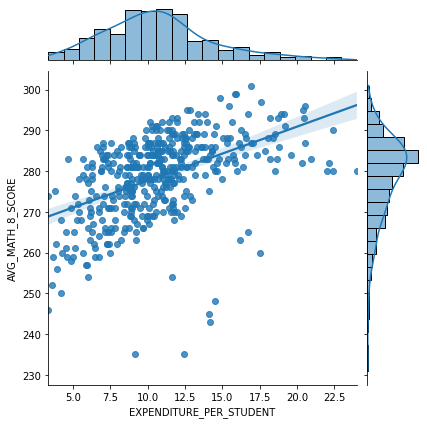

In [18]:
sns.jointplot(data=data, x="EXPENDITURE_PER_STUDENT", y="AVG_MATH_8_SCORE", kind="reg")

**This graph shows how the state's combined expenditure per student affects their math score**

as we can see, greater expenditure has led to signficantly better performance in the math tests. the linear regression fit through the scatter plot also tells us that there is a direct correlation between these two variables.

**Visualization 2**

<AxesSubplot:xlabel='EXPENDITURE_PER_STUDENT', ylabel='STATE'>

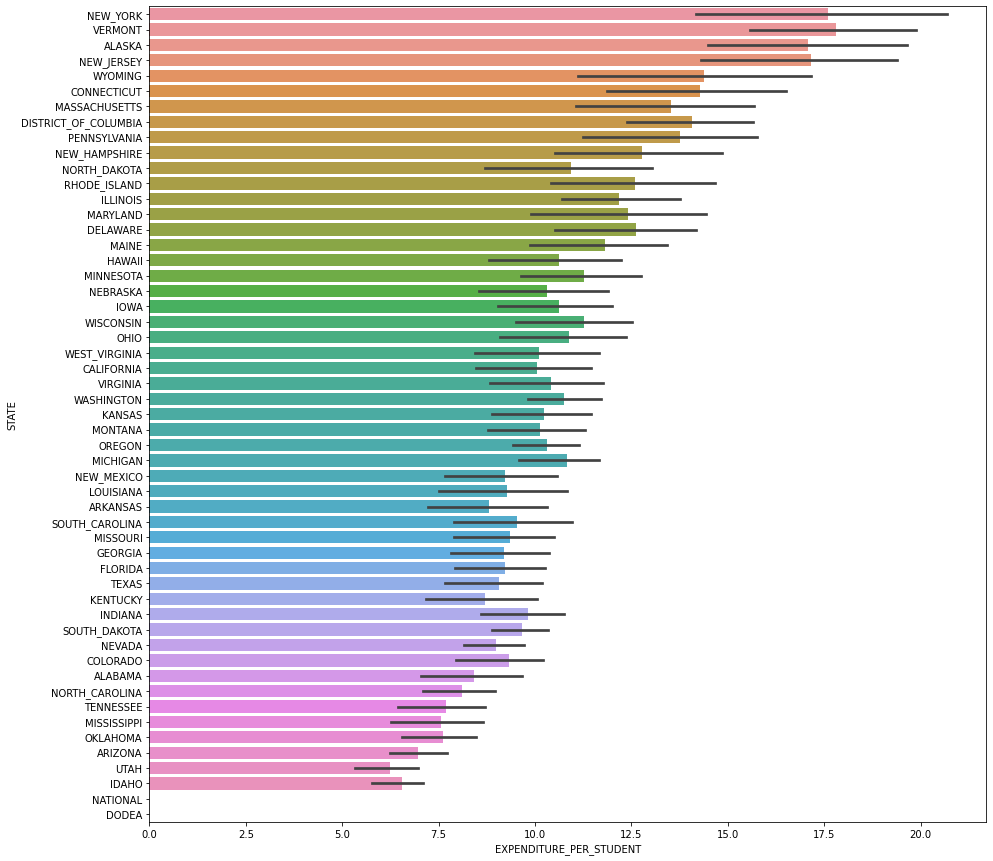

In [21]:
fig,ax = plt.subplots(figsize=(15,15))
sns.barplot(data=data.sort_values(by='EXPENDITURE_PER_STUDENT', ascending=False), x='EXPENDITURE_PER_STUDENT', y='STATE')

<AxesSubplot:xlabel='AVG_MATH_8_SCORE', ylabel='STATE'>

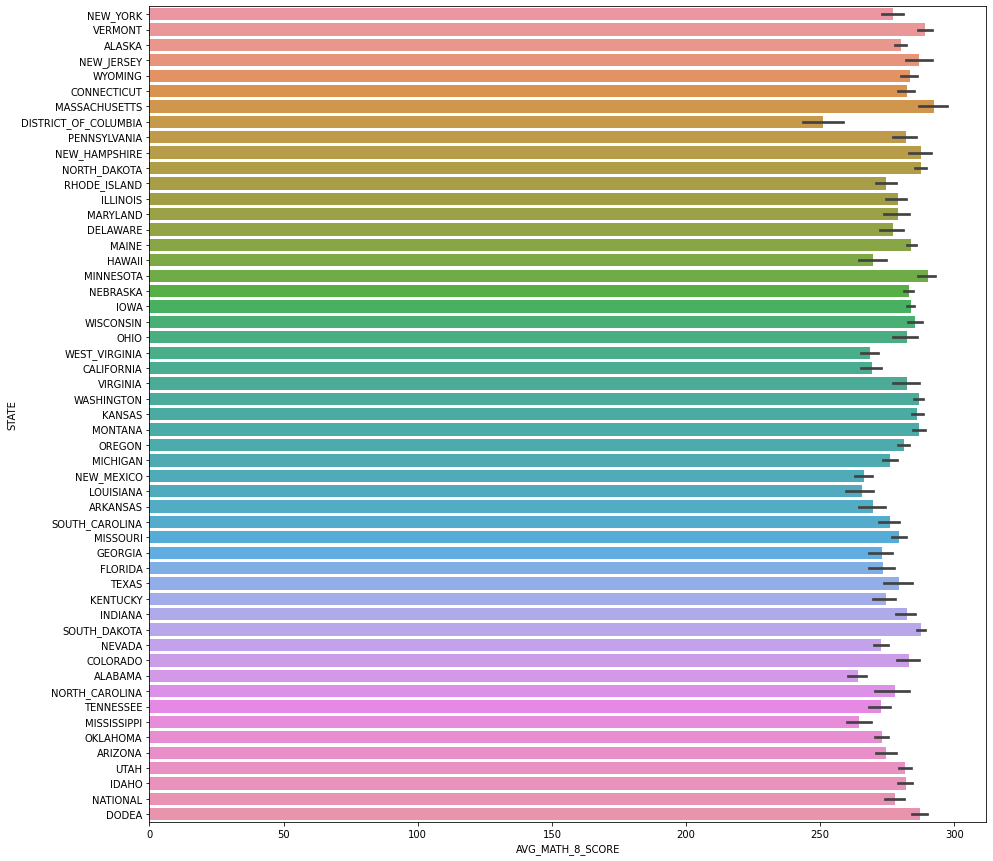

In [28]:
fig,ax = plt.subplots(figsize=(15,15))
sns.barplot(data=data.sort_values(by='EXPENDITURE_PER_STUDENT', ascending=False), x='AVG_MATH_8_SCORE', y='STATE')

<AxesSubplot:xlabel='AVG_MATH_8_SCORE', ylabel='STATE'>

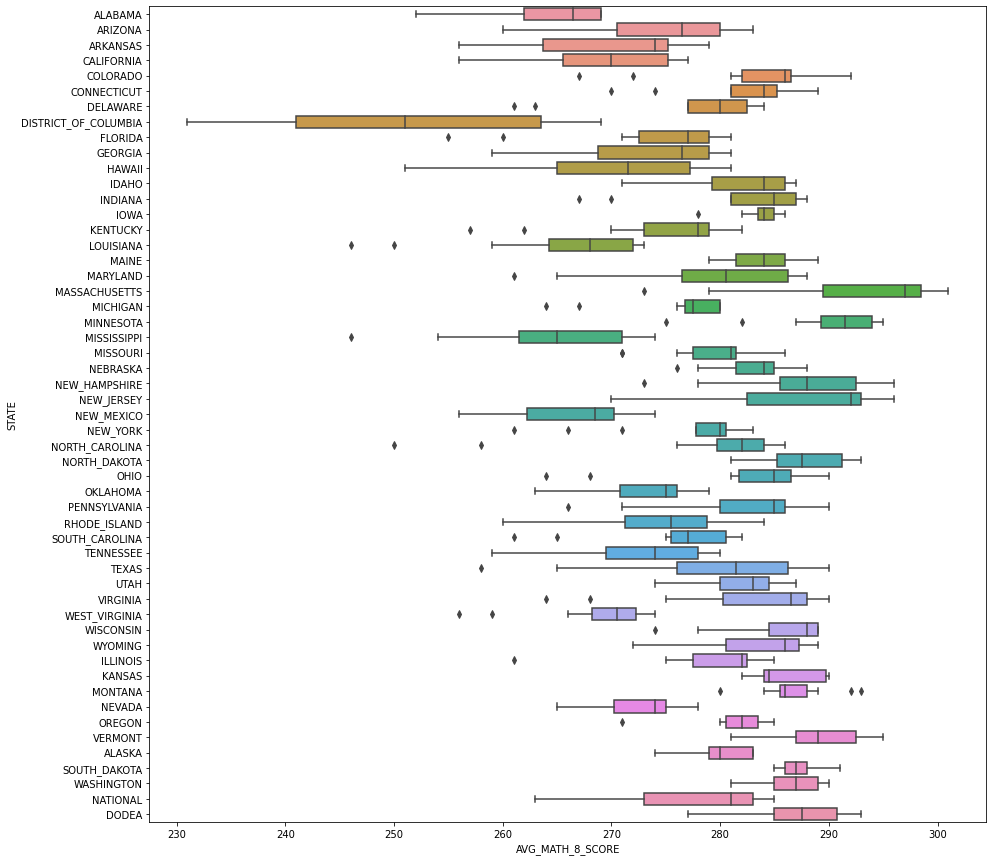

In [30]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=data, x="AVG_MATH_8_SCORE", y="STATE")

**the graphs above show the dependence of the state with the higher expenditure having higher math scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [36]:
from sklearn.model_selection import train_test_split

In [31]:
data.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'EXPENDITURE_PER_STUDENT',
       'AVERAGE_REVENUE'],
      dtype='object')

In [34]:
# making x and y training and testing data sets using the features i earlier mentioned might be related to the 
# variable i want to print
X = data[['TOTAL_REVENUE', 'EXPENDITURE_PER_STUDENT', 'YEAR']].dropna()
y = data.loc[X.index]['AVG_MATH_8_SCORE']

In [37]:
# allocating 35 percent of the data as the testing data
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.35, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **REGRESSION**

In [48]:
# import your sklearn class here
from sklearn.linear_model import Ridge, LinearRegression

In [50]:
# create your model here
model = Ridge()
mode2 = LinearRegression()

In [51]:
mode2.fit(X_train, y_train)

LinearRegression()

In [40]:
model.fit(X_train, y_train)

Ridge()

In [52]:
y_pred1 = mode2.predict(X_test)

In [41]:
y_pred = model.predict(X_test)

In [43]:
# ridge regression
model.score(X_test, y_test)

0.33544256654475835

In [53]:
# linear reg
mode2.score(X_test, y_test)

0.33544230226520366

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

Text(0, 0.5, 'Average Math 8 Score')

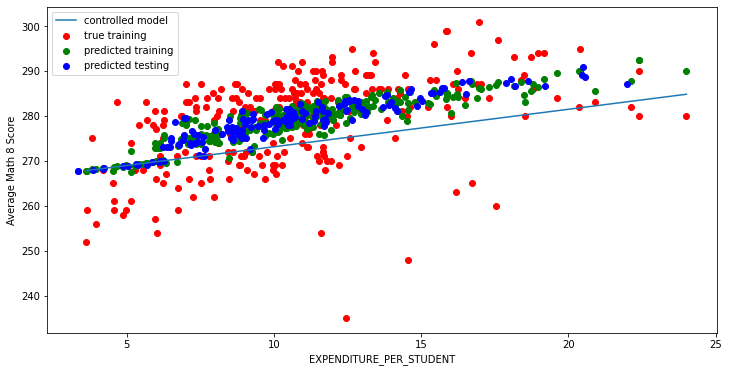

In [44]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')

<h2> Summary </h2>

analyzing the data and extracting featuring out of it gave us a big picture of what factors might affect children's grades in the math exam at grade 8. It was clearly evident that the total expenditure per student in a state's school played a detrimental role in the child's scores. The expenditure due to better teachers, support staff and school faciilities was clearly visible. States that invested heavily on their individuals students had better success with academic in math and also reading at a scale. A linear trend could be fitted using either ridge (slightly better) or linear regression. The model was tested on a 65-35 train test split and dully fits the trend of the given dataset.